In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
#from scipy import integrate
#from numpy.random import random
#from scipy.con
from scipy.constants import pi, Boltzmann, c, G, hbar
from scipy.integrate import quad
import math
import matplotlib.animation as animation
from collections import deque
#import vpython as vpython

## Effective Potential

Using the Schwarzschild radius, 

$$\begin{align}
r_{s} = \frac{2GM}{c^2} 
\end{align}$$

The orbits of a test particle of infinitesimal mass m about the central mass M is given by the equation of motion.

$$\begin{align}
(\frac{\mathrm dr}{\mathrm d\tau})^2 = \frac{E^2}{m^2c^2}-(1-\frac{r_{s}}{r})(c^2+\frac{h^2}{r^2})
\end{align}$$

Where ${\displaystyle h}$ is the specific relative angular momentum,  ${\displaystyle h = {r}\times{v} = \frac{L}{\mu}}$, where $\mu$ is the reduced mass, E is the energy, c is light speed, r is the infinitesimal test particles radius, and $r_{s}$ is the schwarzschild radius of the central mass. This can be converted into an equation for the orbit of the test particle.

$$\begin{align}
(\frac{\mathrm dr}{\mathrm d\phi})^2 = \frac{r^4}{b^2}-(1-\frac{r_{s}}{r})(\frac{r^4}{a^2}+r^2)
\end{align}$$

Where, $\displaystyle a = \frac{h}{c}$ and $\displaystyle b = \frac{Lc}{E}$ have been used. They are the constants of the motion and depend on the inital conditions of the test particle (being position and velocity).

With these, we can then derive an equation for motion.

$$\begin{align}
(\frac{\mathrm dr}{\mathrm d\tau})^2 = \frac{E^2}{m^2c^2}-c^2+(\frac{r_{s}c^2}{r})-(\frac{h^2}{r^2})+\frac{r_{s}h^2}{r^3}
\end{align}$$

This can then be rewritten using the Schwarzschild radius.

$$\begin{align}
\frac{1}{2}m(\frac{\mathrm dr}{\mathrm d\tau})^2 = [\frac{E^2}{2mc^2}-\frac{1}{2}mc^2]+\frac{GMm}{r}-\frac{L^2}{2 \mu r^2}-\frac{G(M+m)L^2}{c^2 \mu r^3}
\end{align}$$

This is equivilant to a particle moving in a one dimensional effective potential.

$$\begin{align}
V(r) = \frac{GMm}{r}-\frac{L^2}{2 \mu r^2}-\frac{G(M+m)L^2}{c^2 \mu r^3}
\end{align}$$

For simplicity, in this report we have set $\displaystyle G,M,\mu$ and $\displaystyle c$ to 1. We have also discarded $\displaystyle m$ due to our test particle having an infinitesimal mass. By doing this, our effective potential equation becomes much simpler.
$$\begin{align}
V(r) = \frac{1}{r}-\frac{L^2}{2r^2}-\frac{L^2}{r^3}
\end{align}$$

The first two are classical energies. The first term is the attractive Newtonian gravitational potential energy and the second term corresponds to the repulsive centrifugal potential energy. To make the code flexible, we have introduced a new binary variable which will include/discard the third term as the third term is an attractive energy unique to general relativity. This allows us to examine orbits that follow general relativity by setting our binary variable to 1, or a more newtonian orbits by setting the value to 0. Our final effective potential equation looks like this.

$$\begin{align}
V(r) = \frac{1}{r}-\frac{L^2}{2r^2}-Ω\frac{L^2}{r^3}
\end{align}$$

where Ω is our binary variable. In the code, this is represented as 'sig_newt'

The third value is responsible for the elliptical orbits to gradually precess by an angle $\displaystyle \delta\phi$ (proportional to $r^3$) per revolution

$$\begin{align}
\delta\phi \approx \frac{6\pi G(M+m)}{c^2A(1-e^2)}
\end{align}$$

Where A is the semi-major axis and e is the eccentricity. As most of the constants have been set to 1, we should expect to see orbits with rougly 6$\pi$ precessions.

In [2]:
def V(u,ang_m,sig_newt):
    return (-u+ (ang_m**2*u**2)/2 - sig_newt * ang_m**2 * u**3)

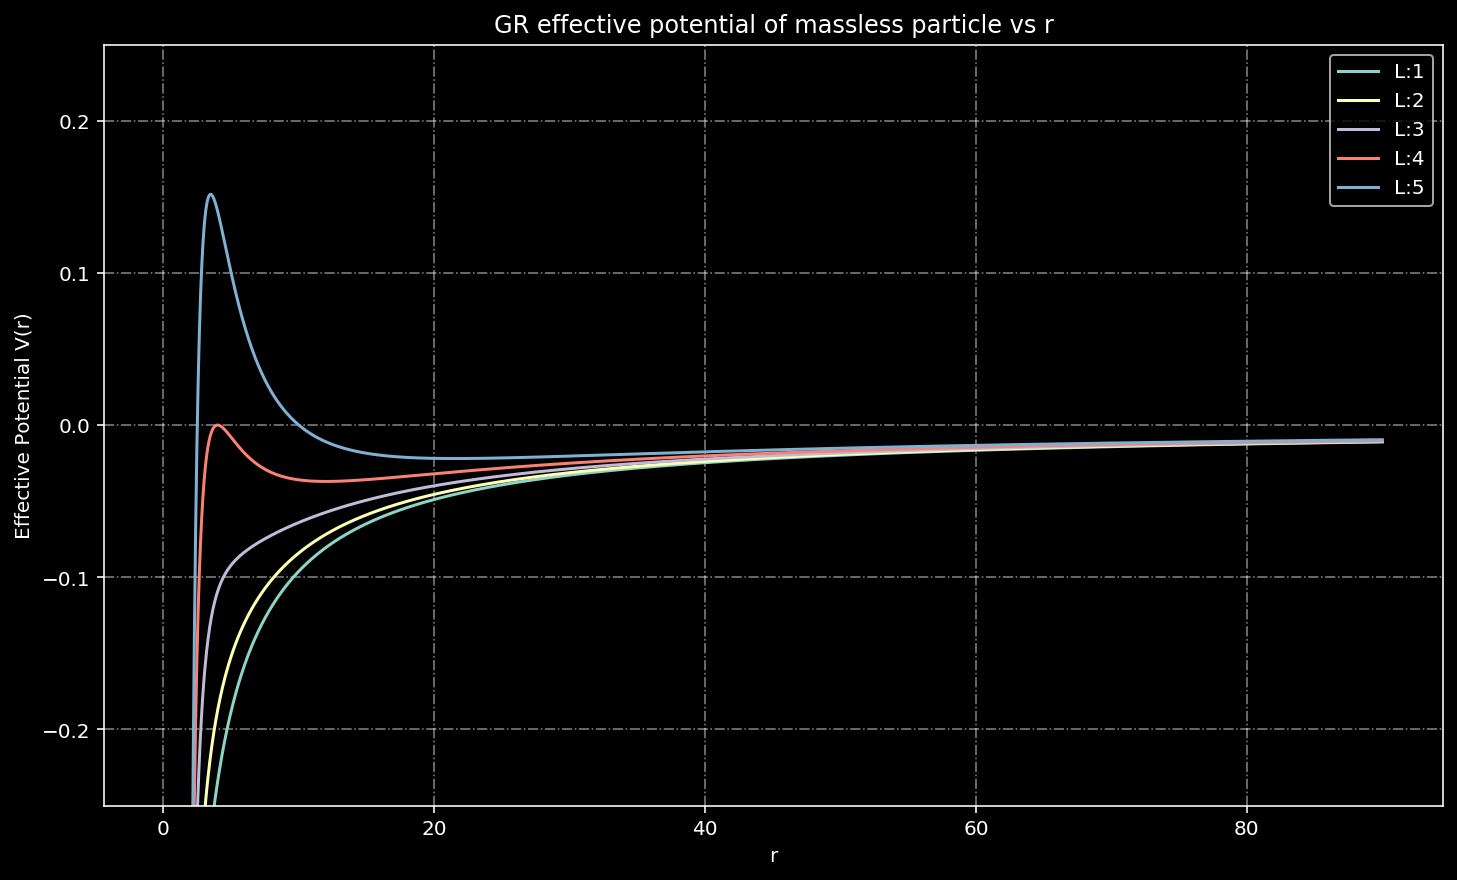

In [3]:
ang_ml = np.linspace(1,5,5)
ang_m = 5
sig_newt = 1
r = np.linspace(0.1,90,3000)
u_array = 1/r
for ang_m in ang_ml:
    v_list = []
    for i in u_array:
        v_list.append(V(i,ang_m,sig_newt))
    plt.style.use('dark_background')
    plt.plot(r,v_list,label=f'L:{int(ang_m)}')
    plt.title('GR effective potential of massless particle vs r')
    plt.ylim(-0.25,0.25)
    plt.ylabel('Effective Potential V(r)')
    plt.xlabel('r')
    plt.grid(alpha=0.5,linestyle='dashdot')
plt.legend()
plt.show()

The shape of this graph is expected, as if we are including the third term of our effective potential V(r), it has the largest impact on the potential for smaller r's. this causes the start of any curve to ascend from a negative potential to a peak, and then even out at a specific value regardless of L. If we were to not include the third term, we should expect to see the graph start from a positive value, then dip towards a minima and even out in the same way. This is because we are removing the dominant negative value at small r's. Due to the nature of our effective potential function, and our binary variable, we can use the same function to visualise this graph.

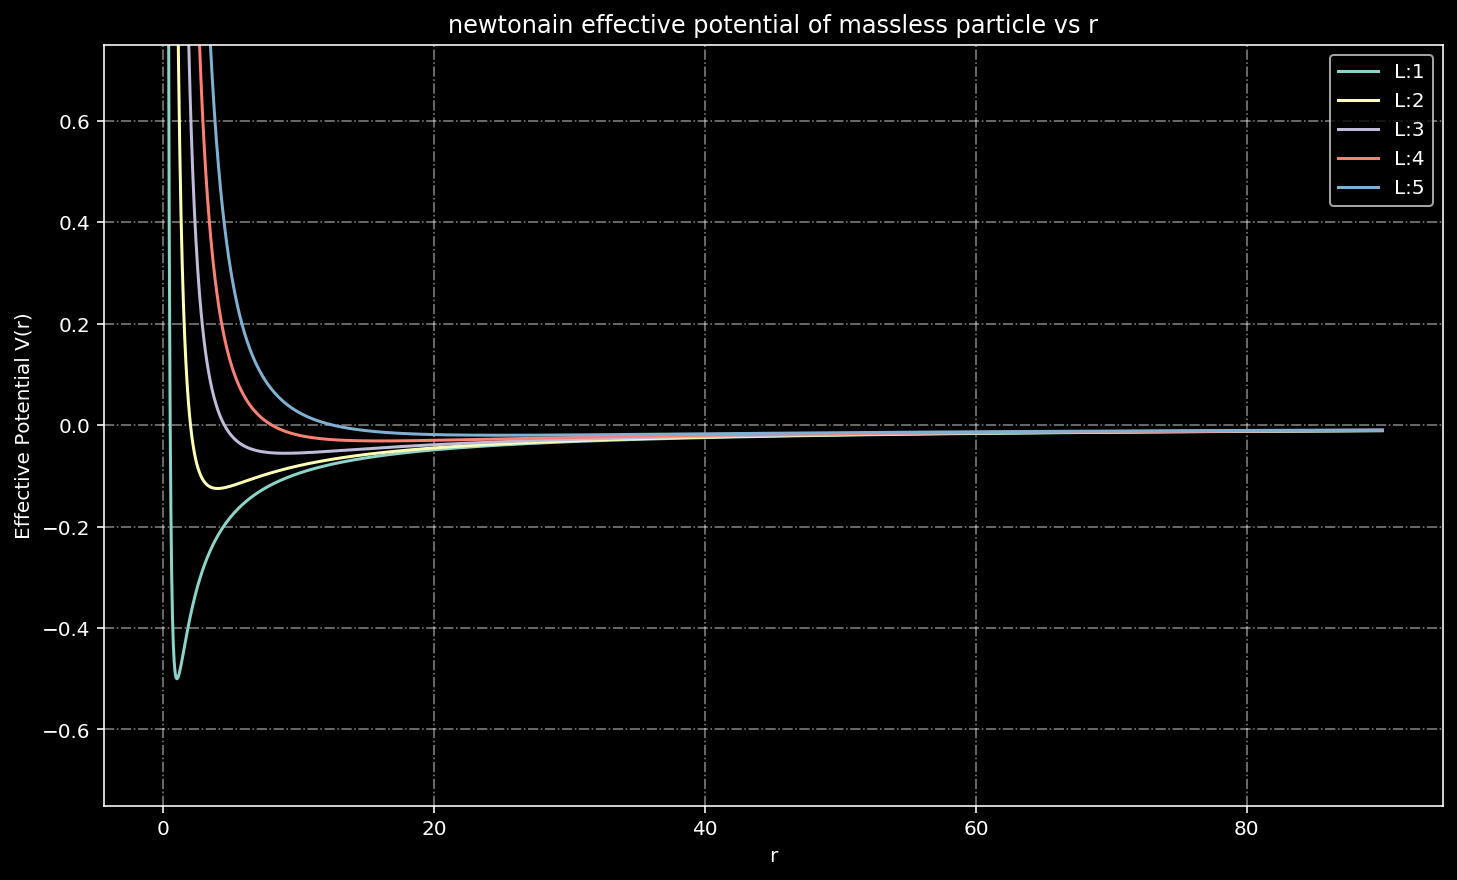

In [4]:
ang_ml = np.linspace(1,5,5)
ang_m = 5
sig_newt = 0
r = np.linspace(0.1,90,3000)
u_array = 1/r
for ang_m in ang_ml:
    v_list = []
    for i in u_array:
        v_list.append(V(i,ang_m,sig_newt))
    plt.plot(r,v_list,label=f'L:{int(ang_m)}')
    plt.style.use('dark_background')
    plt.title('newtonain effective potential of massless particle vs r')
    plt.ylim(-0.75,0.75)
    plt.ylabel('Effective Potential V(r)')
    plt.xlabel('r')
    plt.grid(alpha=0.5,linestyle='dashdot')
plt.legend()
plt.show()

As expected, by setting our binary value to 0, we removed the negative dominiant term (while r is small). This causes the graph to come in from positive V(r). Naturally, the higher L is, the lower the minima is (we can see this from examining our V(r) function). After reaching the minima it evens out at a specific value regardless of L, as the GR version does.

max potential:  0.15160860583505076
min potential:  -0.021985493647536634


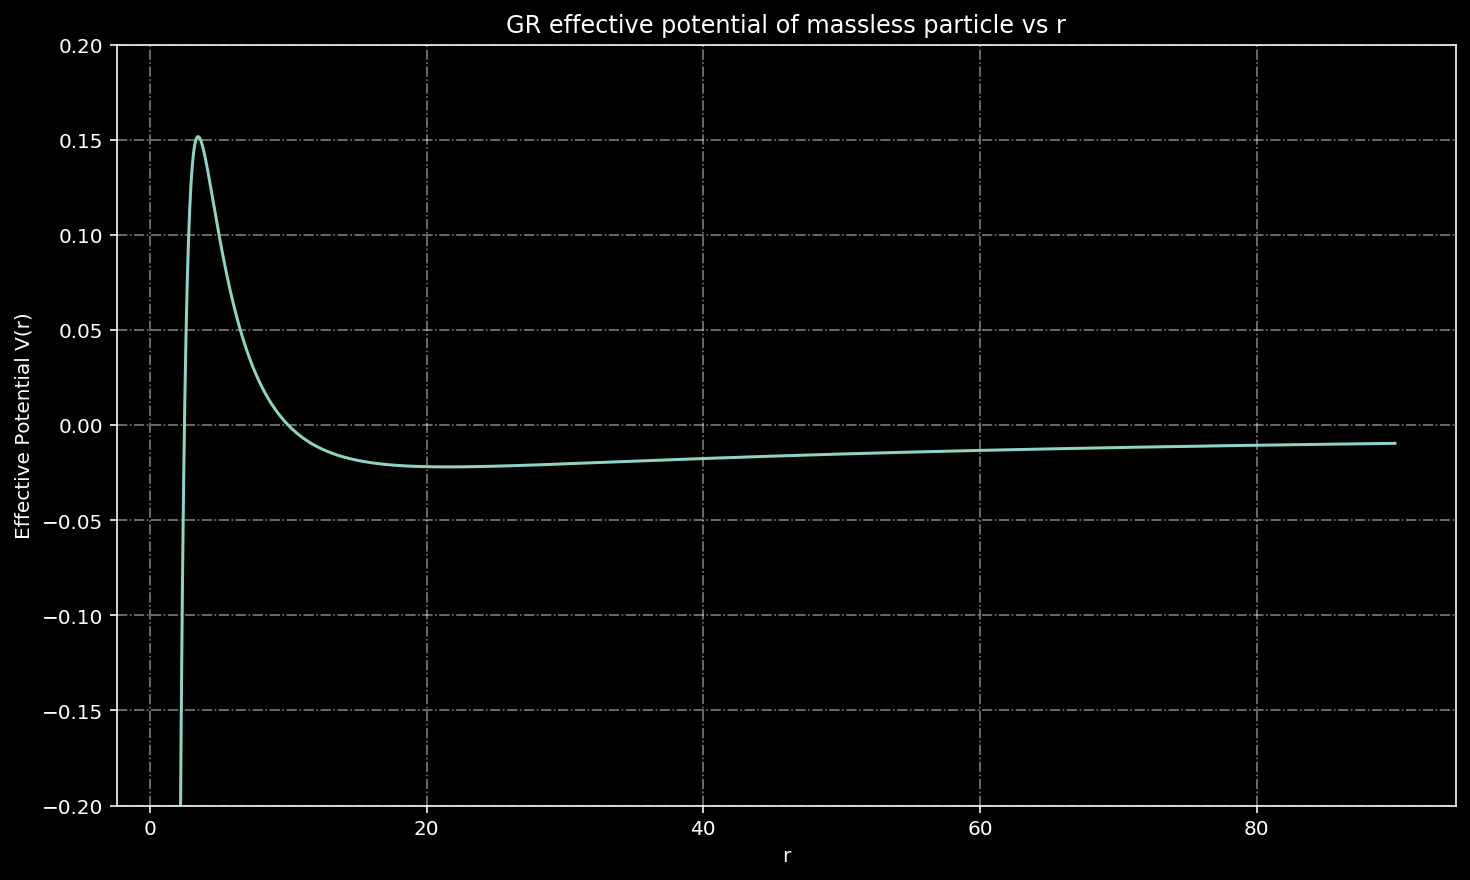

In [5]:
ang_m = 5
sig_newt = 1
r = np.linspace(2,90,3000)
u_array = 1/r
v_list = []
for i in u_array:
    v_list.append(V(i,ang_m,sig_newt))
plt.plot(r,v_list,label=f'L:{int(ang_m)}')
plt.style.use('dark_background')
plt.title('GR effective potential of massless particle vs r')
plt.ylim(-0.2,0.2)
plt.ylabel('Effective Potential V(r)')
plt.xlabel('r')
plt.grid(alpha=0.5,linestyle='dashdot')

# finding the max and min of the potential graph
#----------------------------------------------------------------#
vmax = max(v_list)
vmin = min(v_list[v_list.index(vmax):])
print('max potential: ',vmax)
print('min potential: ',vmin)

using $\displaystyle L=5$ and $\Omega = 1$ as an example, we can use pythons built in max() and min() functions to locate where $\frac{dV(r)}{dr} = 0$. Due to the curves behaviour we must be sure that python doesn't mistake the first calculated value as the lowest value of V(r) (the value that the curve starts at). As this graph features a maxima before its minima, we can simply say that we can look for a maxima across the whole curve, and we can look for the minima from all points after the maxima. This will only work when $\Omega$ = 1 and $\displaystyle L = 5,4$. This is the case as, by looking at the curves from $\displaystyle L = 1,2,3$ on the GR graph, we can see that the idea of a maxima occuring before a minima doesn't apply, same with the curves for newtonian potentials.

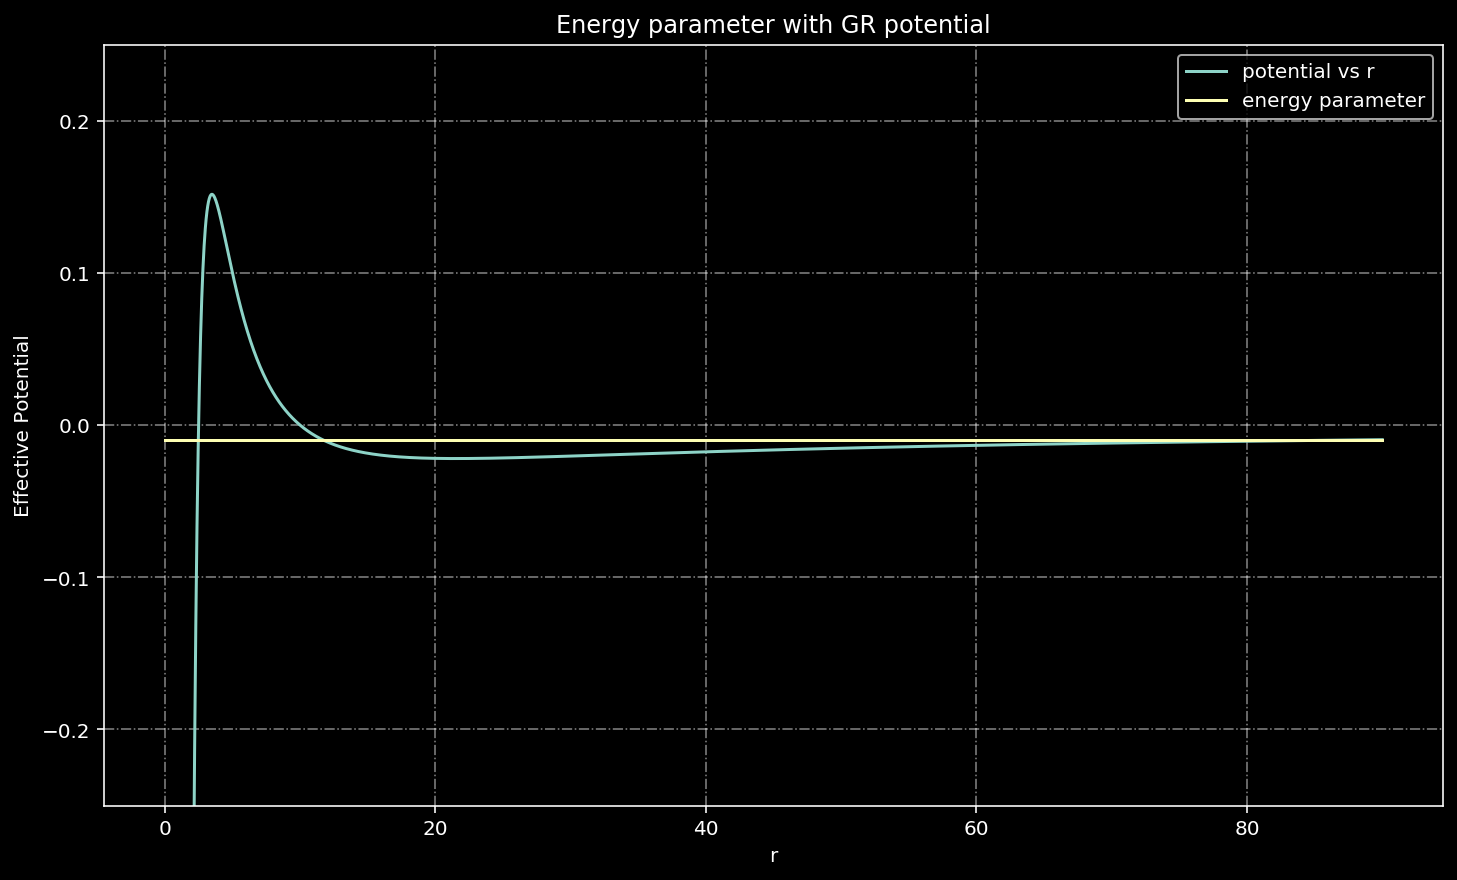

In [6]:
E = -0.01
plt.title('Energy parameter with GR potential')
plt.plot(r,v_list,label='potential vs r')
plt.plot((0,90),(E,E),label='energy parameter')
plt.ylim(min(v_list),max(v_list))
plt.ylabel('Effective Potential')
plt.xlabel('r')
plt.legend()
plt.ylim(-0.25,0.25)
plt.grid(alpha=0.5,linestyle='dashdot')
plt.show()

we can also consider the energy of the test particle, by setting the energy parameter $\epsilon$ where $\epsilon = 0.5\times({e^2-1})$. For orbits of any kind, the energy parameter must be greater then the minimum value of V(r) and less then the maxima. With this graph, we can identify the type of orbit our test particle will have around our central mass. To able to differentiate which orbit the particle will take we must examine the intercepts between the potential curve and the energy parameter. To make this easier, I have created a new function that will set the energy parameter to 0 by graphing the original effective potential - the energy parameter as seen here. 

In [7]:
def VE(u,ang_m,sig_newt,E):
    return ((-u+ (ang_m**2*u**2)/2 - sig_newt * ang_m**2 * u**3)-E)

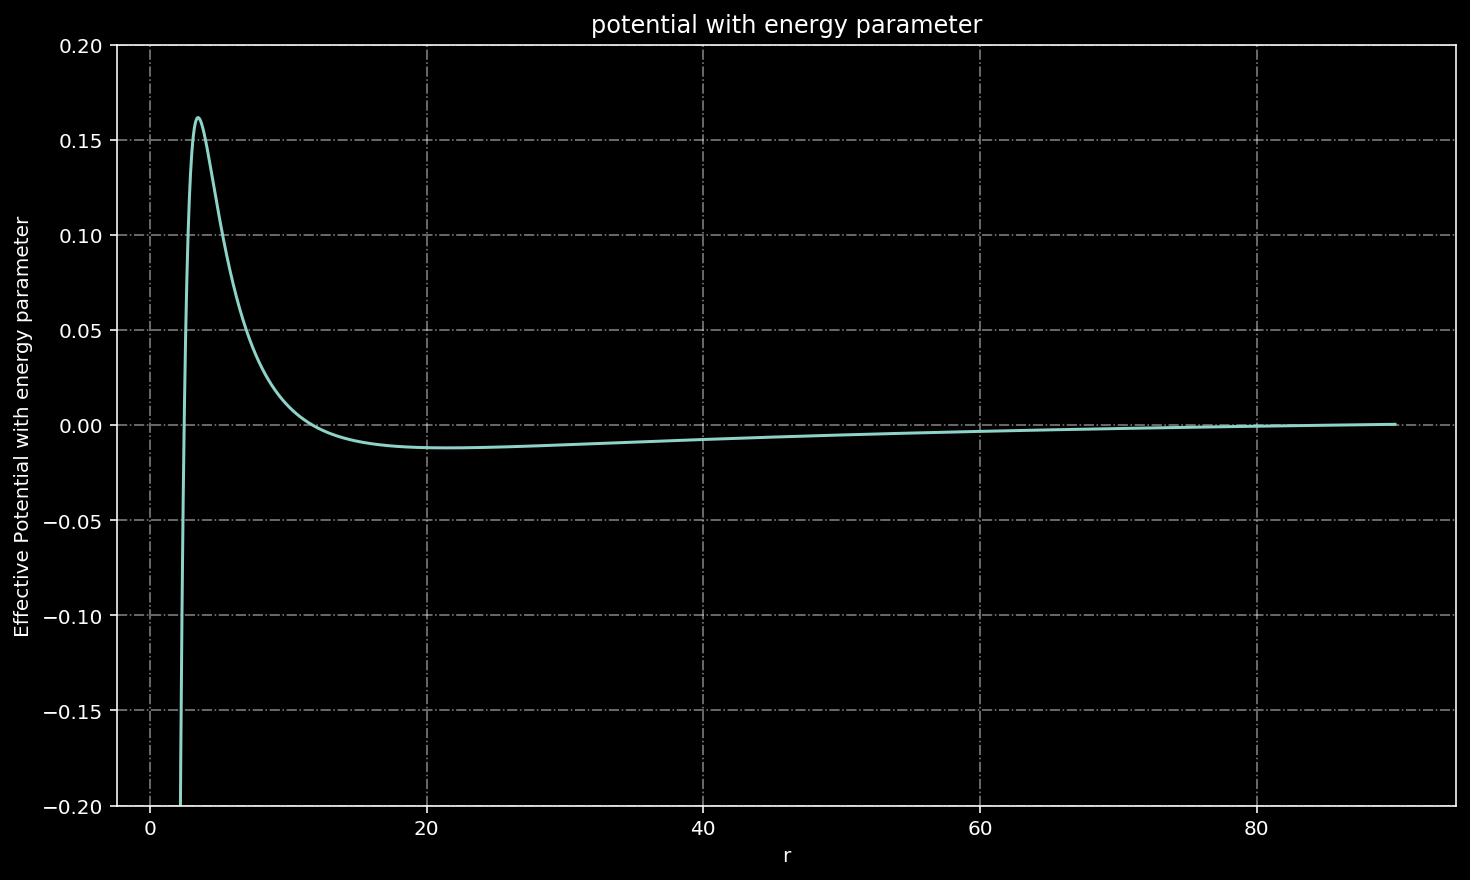

In [8]:
v1_list = []
for i in u_array:
    v1_list.append(VE(i,ang_m,sig_newt,E))
plt.title('potential with energy parameter')
plt.plot(r,v1_list)
plt.ylim(min(v1_list),max(v1_list))
plt.ylabel('Effective Potential with energy parameter')
plt.xlabel('r')
plt.ylim(-0.2,0.2)
plt.grid(alpha=0.5,linestyle='dashdot')
plt.show()

from here, if we can identify the interval where the V(r) curve crosses the x axis, we can find the root (because there wont be an exact point, there will be an interval in which the root exists). We can simply have the code search the list of points and find the matching x value of the smaller y value in the intervals it finds. We can ask it to find the correct intervals by asking the code to look for 2 consecutive numbers with opposite signs. These 2 numbers will be each end of the interval for which the root will lie inbetween. We can experiment with different root finding methods here however since we've made the linspace that creates the r values feature thousands of numbers, the roots will be fairly accurate already and using a different method won't change the final result much to at all. the function that creates this graph is called VE and only used here.

In [9]:
def VE(u,ang_m, sig_newt, E):
    return ((-u + (ang_m**2*u**2)/2 - sig_newt * ang_m**2 * u**3) - E)

tp_e = []
for i in range(len(v1_list)-1):
    if v1_list[i] > 0 and v1_list[i+1] < 0:
        average_r = (r[i] + r[i+1])/2
        root = average_r**-1
        tp_e.append(root)
    if v1_list[i] < 0 and v1_list[i+1] > 0:
        average_r = (r[i] + r[i+1])/2
        root = average_r**-1
        tp_e.append(root)
print('roots:', tp_e)

roots: [0.4025503355704698, 0.08505871007998184, 0.011660458642114511]


Now that we are aware of the roots of our potential - energy function, we can predict what type of orbit we would expect the test particle to take. From there we can choose suitable integration bounds
We must also define a parameter to determine how close the bounds get to the turning points.

The orbit will be bound if: E < 0 and the inverse of the starting radius is smaller then second root.
If this is the case, the integration bounds will be $root_{3}\times(1+epsilon)$ and $root_{2}\times(1-epsilon)$

The orbit will go from and too infinity if: 0 < E < vmax and the inverse of the starting radius is smaller then the second root.
If this is the case, the integration bounds will be $(R_{initial})^-1$ and $root_{2}\times(1-epsilon)$

The orbit will start from r=2M and go back into it if: E < vmax, and the inverse of the starting radius is smaller then the first root.
If this is the case, the integration bounds will be $0.5$ and $root_{1}\times(1+epsilon)$

The orbit will plunge coming from infinity if: E > vmax.
If this is the case, the integration bounds will be $(R_{initial})^-1$ and $0.5\times(1-epsilon)$

In [10]:
start_radius = 20
eps = 1e-8
start_u = 1/start_radius
'''
tp_e is currently [0.4025503355704698, 0.08505871007998184, 0.011660458642114511]
'''
# test for bound, inf to inf, close to fall & plung  orbit
testa = E < 0 and start_u < tp_e[1]
print('testa: ',testa)
if testa == True:
    u1 = tp_e[2]*(1+eps)
    u2 = tp_e[1]*(1-eps)
testb = E > 0 and E < vmax and start_u < tp_e[1]
print('testb: ', testb)
if testb == True:
    u1 = start_u
    u2 = tp_e[1]*(1-eps)
testc = E < vmax and start_u > tp_e[0]
print('testc: ',testc)
#print(f'E:{E}, vmax: {vmax}, start_u: {start_u}, tp_e[0]: {tp_e[0]}')
if testc == True:
    u1 = 0.5
    u2 = tp_e[0]*(1+eps)
testd = E > vmax
print('testd: ',testd)
if testd == True:
    u1 = start_u
    u2 = 0.5*(1-eps)

testa:  True
testb:  False
testc:  False
testd:  False


using this, we can calculate the angle swept out from the inner most turning point which is given by: 

$\Theta = \int_{u1}^{u2}{\frac{L}{\sqrt{2}}}\times \frac{1}{\sqrt{E - V(r)}}$

from this, we can calculate the total angle swept out by the orbit from the 2 endpoints, this angle is called delphi.

In [11]:
def theta(u2,u1,ang_m,E,sig_newt):
    integral = lambda w: (ang_m/(2**0.5)) * (E - V(w,ang_m,sig_newt))**(-1/2)
    try:
        integrated = quad(integral,u1,u2)[0]
    except TypeError:
        h = 1 / 100
        intgr = 0.5 * h * (integral(u1) + integral(u2))
        for i in range(1, 100):
            intgr = intgr + h * integral(i * h)
        return (intgr).real
    return integrated

if u2>u1:
    delphi = theta(u2,u1,ang_m,E,sig_newt)
    print('1limits of integration:', u1, 'to', u2)
elif u2<u1:
    print('2limits of integration:', u2, 'to', u1)
    delphi = theta(u1,u2,ang_m,E,sig_newt)
print('delphi: ',delphi)

1limits of integration: 0.011660458758719097 to 0.08505870922939474
delphi:  3.698774469500177


with this value of $\Theta$, we can calculate the accumulated value of $\Theta$ as a function of the test particles position using the following functions using z (z is a the number of orbits to be calculated and displayed which ranges from 0 to numorbit).

accphi is the function that displays the position of the particle along the orbit as a function of z.

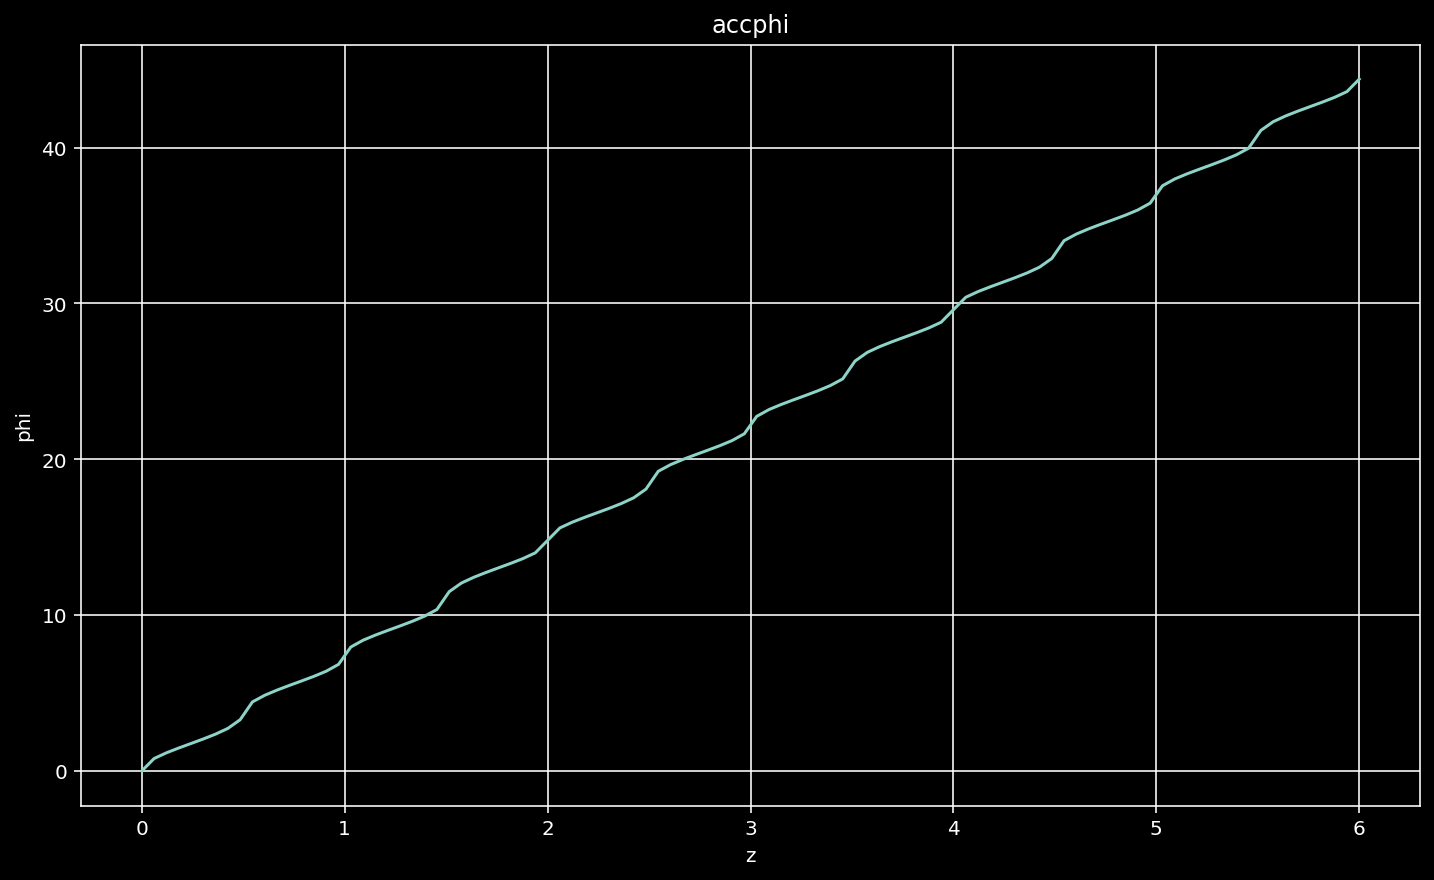

In [12]:
def n(z):
    return int(z)

def zf(z):
    return math.modf(z)[0]

def ua(z,u2,u1):
    return u1 * (1-2*zf(z)) + u2*2*zf(z)

def ub(z,u2,u1):
    return u1 * (2*zf(z)-1) + 2*u2*(1-zf(z))

def u(z,u2,u1):
    if zf(z) < 0.5:
        return ua(z,u2,u1)
    else:
        return ub(z,u2,u1)

def phia(z,delphi,u2,u1,ang_m,E,sig_newt):
    return (2 * (n(z))*delphi) + theta(u(z,u2,u1), u1, ang_m, E,sig_newt)

def phib(z,delphi,u2,u1,ang_m,E,sig_newt):
    return (2 * (n(z) + 1) *delphi) - theta(u(z,u2,u1), u1, ang_m, E,sig_newt)

def accphi(z,delphi,u2,u1,ang_m,E,sig_newt):
    if zf(z) < 0.5:
        return phia(z,delphi,u2,u1,ang_m,E,sig_newt)
    else:
        return phib(z,delphi,u2,u1,ang_m,E,sig_newt)

num_orbit = 6
yl = []
if testa == True:
    num_orbit = num_orbit
else:
    num_orbit = 1
if testd == True:
    num_orbit = 0.5
if num_orbit > 1:
    z = np.linspace(0,num_orbit,100)
    for i in z:
        yl.append(accphi(i,delphi,u2,u1,ang_m,E,sig_newt))
    plt.plot(z,yl)
    plt.xlabel("z")
    plt.ylabel('phi')
    plt.title('accphi')
    plt.grid()
    plt.show()

from here we can convert these coordinates into cartesian coordinates to find the trajectory of the test particle

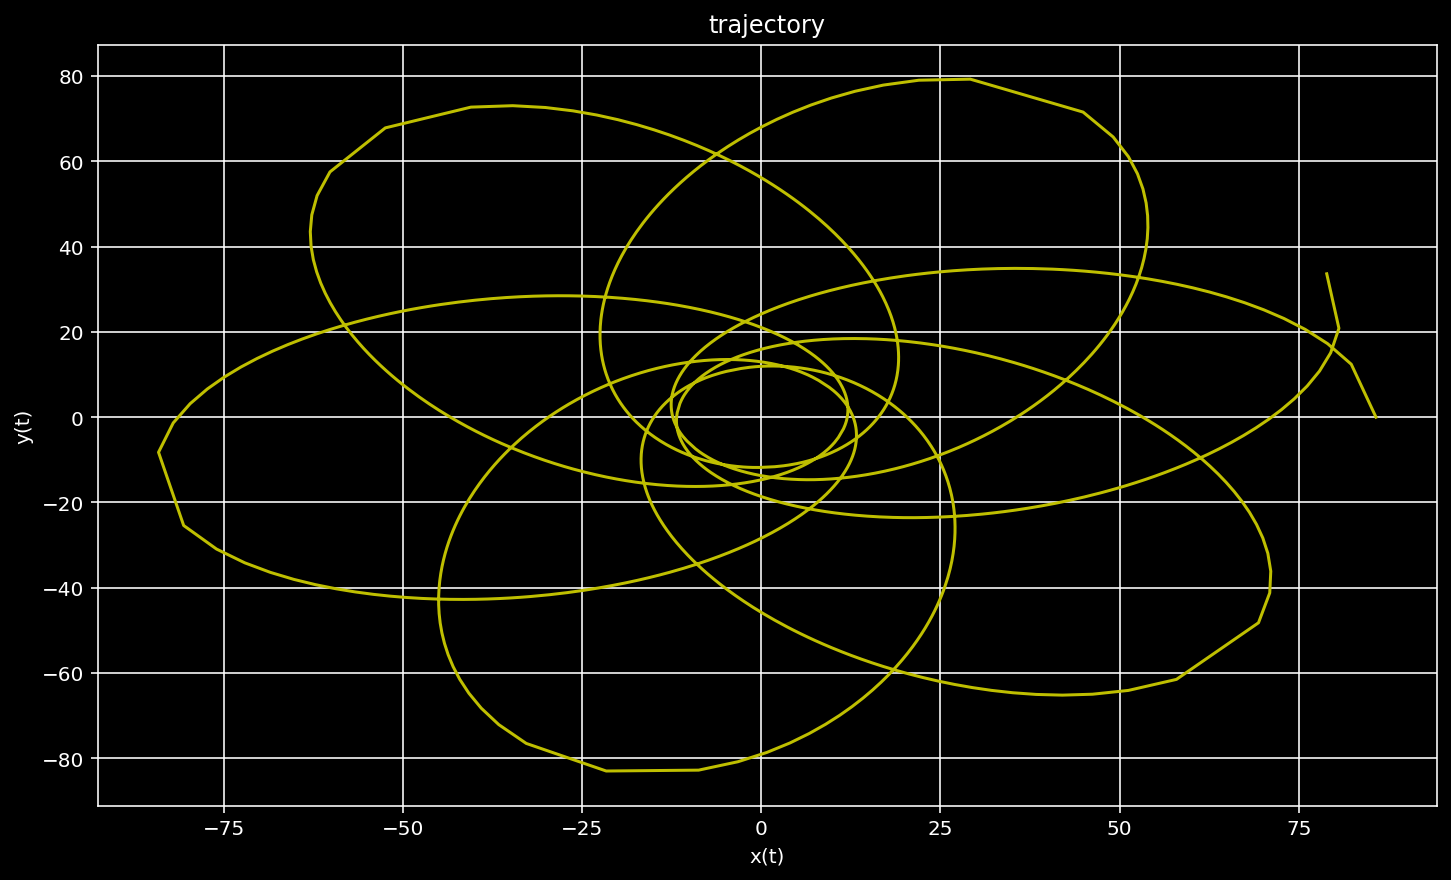

In [13]:
def x(z,delphi,u2,u1,ang_m,E,sig_newt):
    return (np.cos(accphi(z,delphi,u2,u1,ang_m,E,sig_newt)))/u(z,u2,u1)

def y(z,delphi,u2,u1,ang_m,E,sig_newt):
    return (np.sin(accphi(z,delphi,u2,u1,ang_m,E,sig_newt)))/u(z,u2,u1)

"""def animate(i,xl,yl,dt,history_x,history_y,line,trace,time_template,time_text,):
    if i == 0:
        history_x.clear()
        history_y.clear()
    
    history_x.append(xl[i])
    history_y.append(yl[i])

    line.set_data(xl[i],yl[i])
    trace.set_data(history_x,history_y)
    time_text.set_text(time_template % (i*dt))
    return line, trace, time_text"""

precision = 2500
xl = []
yl = []
zz = np.linspace(0,num_orbit,precision)
for t in zz:
    xl.append(x(t,delphi,u2,u1,ang_m,E,sig_newt))
    yl.append(y(t,delphi,u2,u1,ang_m,E,sig_newt))
plt.plot(xl,yl,'y-')
plt.xlabel("x(t)")
plt.ylabel('y(t)')
plt.title('trajectory')
plt.grid()
plt.show()

from the orbit pattern, we can see that, with the chosen parameters the orbit follows testA, in that its a bound orbit with precession, starting at its turning point.

to make analysing the trajectory of a test particle around a mass easier, I have created a function that will execute all the previous steps at once allowing us to view lots of different scenarios.

In [14]:
%matplotlib inline

def visandcalc(ang_m,sig_newt,E,start_radius,num_orbit,eps,dt,history_len,precision,rate):

    # graphing the potential
    #----------------------------------------------------------------#
    r = np.linspace(2,90,3000)
    u_array = 1/r
    v_list = []
    for i in u_array:
        v_list.append(V(i,ang_m,sig_newt))
    plt.plot(r,v_list)
    plt.title('effective potential vs r')
    plt.ylim(min(v_list),max(v_list))
    plt.ylabel('Effective Potential')
    plt.xlabel('r')
    plt.grid()
    plt.show()

    # finding the max and min of the potential graph
    #----------------------------------------------------------------#
    vmax = max(v_list)
    vmin = min(v_list[v_list.index(vmax):])
    print('max potential: ',vmax)
    print('min potential: ',vmin)

    # visualising the energy parameter to observe orbit type
    #----------------------------------------------------------------#
    plt.title('Energy parameter with potential')
    plt.plot(r,v_list,'b-',label='potential vs r')
    plt.plot((0,90),(E,E),'g-',label='energy parameter')
    plt.ylim(min(v_list),max(v_list))
    plt.ylabel('Effective Potential')
    plt.xlabel('r')
    plt.legend()
    plt.grid()
    plt.show()

    # solving for x intercept with energy parameter in mind
    #----------------------------------------------------------------#
    v1_list = []
    for i in u_array:
        v1_list.append(VE(i,ang_m,sig_newt,E))
    plt.title('potential with energy parameter')
    plt.plot(r,v1_list)
    plt.ylim(min(v1_list),max(v1_list))
    plt.ylabel('Effective Potential with energy parameter')
    plt.xlabel('r')
    plt.grid()
    plt.show()

    # finding the intercepts based on signs (- and +)
    #----------------------------------------------------------------#
    tp_e = []
    for i in range(len(v1_list)-1):
        if v1_list[i] > 0 and v1_list[i+1] < 0:
            average_r = (r[i] + r[i+1])/2
            root = average_r**-1
            tp_e.append(root)
        if v1_list[i] < 0 and v1_list[i+1] > 0:
            average_r = (r[i] + r[i+1])/2
            root = average_r**-1
            tp_e.append(root)
    print('roots:', tp_e)

    # testing for each orbit types
    #----------------------------------------------------------------#
    start_u = 1/start_radius
    '''
    tp_e is currently [0.4025503355704698, 0.08505871007998184, 0.011660458642114511]
    '''
    # test for bound, inf to inf, close to fall & plung  orbit
    testa = E < 0 and start_u < tp_e[1]
    print('testa: ',testa)
    if testa == True:
        u1 = tp_e[2]*(1+eps)
        u2 = tp_e[1]*(1-eps)
    testb = E > 0 and E < vmax and start_u < tp_e[1]
    print('testb: ', testb)
    if testb == True:
        u1 = start_u
        u2 = tp_e[1]*(1-eps)
    testc = E < vmax and start_u > tp_e[0]
    print('testc: ',testc)
    #print(f'E:{E}, vmax: {vmax}, start_u: {start_u}, tp_e[0]: {tp_e[0]}')
    if testc == True:
        u1 = 0.5
        u2 = tp_e[0]*(1+eps)
    testd = E > vmax
    print('testd: ',testd)
    if testd == True:
        u1 = start_u
        u2 = 0.5*(1-eps)

    # computing delphi
    #----------------------------------------------------------------#
    if u2>u1:
        delphi = theta(u2,u1,ang_m,E,sig_newt)
        print('1limits of integration:', u1, 'to', u2)
    elif u2<u1:
        print('2limits of integration:', u2, 'to', u1)
        delphi = theta(u1,u2,ang_m,E,sig_newt)
    print('delphi: ',delphi)

    # graphing accphi, the accumulated angle as a function of position.
    #----------------------------------------------------------------#
    yl = []
    if testa == True:
        num_orbit = num_orbit
    else:
        num_orbit = 1
    if testd == True:
        num_orbit = 0.5
    if num_orbit > 1:
        z = np.linspace(0,num_orbit,100)
        for i in z:
            yl.append(accphi(i,delphi,u2,u1,ang_m,E,sig_newt))
        plt.plot(z,yl)
        plt.xlabel("z")
        plt.ylabel('phi')
        plt.title('accphi')
        plt.grid()
        plt.show()

    # graphing a test particles trajectory
    #----------------------------------------------------------------#
    xl = []
    yl = []
    zz = np.linspace(0,num_orbit,precision)
    for t in zz:
        xl.append(x(t,delphi,u2,u1,ang_m,E,sig_newt))
        yl.append(y(t,delphi,u2,u1,ang_m,E,sig_newt))
    plt.plot(xl,yl,'y-')
    plt.xlabel("x(t)")
    plt.ylabel('y(t)')
    plt.title('trajectory')
    plt.grid()
    plt.show()

    '''
    # animating the graph
    #----------------------------------------------------------------#
    fig = plt.figure(figsize=(5,5))
    if testa == True:
        ax = fig.add_subplot(autoscale_on=False, xlim=(-100, 100), ylim=(-100, 100))
        circle = plt.Circle((0,0),100/16,color='black')
    if testb == True:
        ax = fig.add_subplot(autoscale_on=False, xlim=(min(xl), max(xl)), ylim=(min(yl), max(yl)))
        circle = plt.Circle((0,0),max(xl)/16,color='black')
    if testc == True:
        ax = fig.add_subplot(autoscale_on=False, xlim=(min(xl), max(xl)), ylim=(min(yl), -min(yl)))
        circle = plt.Circle((0,0),max(xl)/16,color='black')
    if testd == True:
        ax = fig.add_subplot(autoscale_on=False, xlim=(-100, 100), ylim=(-100, 100))
        circle = plt.Circle((0,0),100/16,color='black')
    ax.set_aspect('equal', adjustable='box')
    dt = dt
    history_len = history_len
    line, = ax.plot([], [], 'o-', lw=2)
    trace, = ax.plot([], [], ',-', lw=1)
    ax.add_patch(circle)
    time_template = 'time = %.1fs'
    time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
    history_x, history_y = deque(maxlen=history_len), deque(maxlen=history_len)

    def animate(i):
        if i == 0:
            history_x.clear()
            history_y.clear()
        
        history_x.append(xl[i])
        history_y.append(yl[i])

        line.set_data(xl[i],yl[i])
        trace.set_data(history_x,history_y)
        time_text.set_text(time_template % (i*dt))
        return line, trace, time_text

    ani = animation.FuncAnimation(fig,animate,len(yl),interval=dt*1000,blit=True)
    plt.show()
    #print(xl)
    #print(yl)
    
    
    #vpython animation
    #----------------------------------------------------------------#
    scene = vpython.canvas(title='Schwarzschild null geodesic',width=1000,height=1000,background=vpython.color.black)
    scene.lights = []
    vpython.distant_light(direction=vpython.vector( 0.22,  0.44,  0.88),color=vpython.color.gray(0.3)),
    vpython.distant_light(direction=vpython.vector(-0.88, -0.22, -0.44),color=vpython.color.gray(0.1))
    scene.ambient=vpython.color.gray(0.2)
    mass = vpython.sphere(pos=vpython.vector(0,0,0),color=vpython.color.white,radius=5,opacity=0.25)
    mass = vpython.sphere(pos=vpython.vector(0,0,0),color=vpython.color.black,radius=4)
    null = vpython.sphere(pos=vpython.vector(xl[0],yl[0],0),color=vpython.color.blue,make_trail=True,
        radius=1,interval=1,trail_radius=0.25,trail_color=vpython.color.orange)
    for i in range(1,len(xl)-1):
        vpython.rate(rate)
        null.pos =  vpython.vector(xl[i],yl[i],0)
   '''
    

# visandcalc
# visualise and calculate trajectory of null geodesic
# arguments of function are: 
# angular momentum (5)
# sig_newt (1) 
    # Set it equal to 1 
    # for general relativity, 0 for a Newtonian 1/r potential, and an appropriate 
    # value for a Newtonian 1/r potential with
    # an additional quadrupole moment term
# energy parameter (-0.01)
# starting radius (20) The starting radius for an orbit which is not bound 
    # Schwarzschild radius / photon sphere related?
# num_orbit (3) The number of orbits to be computed if the orbit is bound
# eps (1e-8) The integrand diverges near the turning points, so we specify a parameter eps 
    # which determines how close the numerical integration comes to the turning points
# dt (0.00002) refresh rate of animation
# history_len (50000) amount of points that appear in trail of particle
# precission (5000) , precission of animation 
# rate (100), rate of vpython animation
'''
WORKS
testA
Bound obits which start at the outer turning point. 
visandcalc(5,1,-0.01,20,6,1e-8,0.02,500)
visandcalc(5,1,-0.01,30,6,1e-8,0.00002,5000000)
testB
Orbits which come in from infinity and go out again. These start at rst.
visandcalc(5,1,0.01,20,6,1e-8,0.00002,5000000)
testC
Orbits which start close to r=2M and fall back to it. 
visandcalc(5,1,0.095,2,6,1e-8,0.00002,5000000)

line 20, in theta
    integrated = quad(integral,u1,u2)[0]
TypeError: can't convert complex to float
visandcalc(4.9,1,-0.01,20,6,1e-8,0.02,500)
visandcalc(5.1,1,-0.01,20,6,1e-8,0.02,500)
visandcalc(5,1,0.02,20,6,1e-8,0.00002,5000000)
'''
#visandcalc(5,1,-0.01,20,6,1e-8,0.00002,5000000,2500,100)
#visandcalc(5,1,0.01,20,6,1e-8,0.00002,5000000,2500,100)
#visandcalc(5,1,0.095,1,6,1e-8,0.00002,5000000,2500,100)
#visandcalc(5,1,2,50,6,1e-8,0.00002,5000000,2500,100)

"\nWORKS\ntestA\nBound obits which start at the outer turning point. \nvisandcalc(5,1,-0.01,20,6,1e-8,0.02,500)\nvisandcalc(5,1,-0.01,30,6,1e-8,0.00002,5000000)\ntestB\nOrbits which come in from infinity and go out again. These start at rst.\nvisandcalc(5,1,0.01,20,6,1e-8,0.00002,5000000)\ntestC\nOrbits which start close to r=2M and fall back to it. \nvisandcalc(5,1,0.095,2,6,1e-8,0.00002,5000000)\n\nline 20, in theta\n    integrated = quad(integral,u1,u2)[0]\nTypeError: can't convert complex to float\nvisandcalc(4.9,1,-0.01,20,6,1e-8,0.02,500)\nvisandcalc(5.1,1,-0.01,20,6,1e-8,0.02,500)\nvisandcalc(5,1,0.02,20,6,1e-8,0.00002,5000000)\n"

Test A

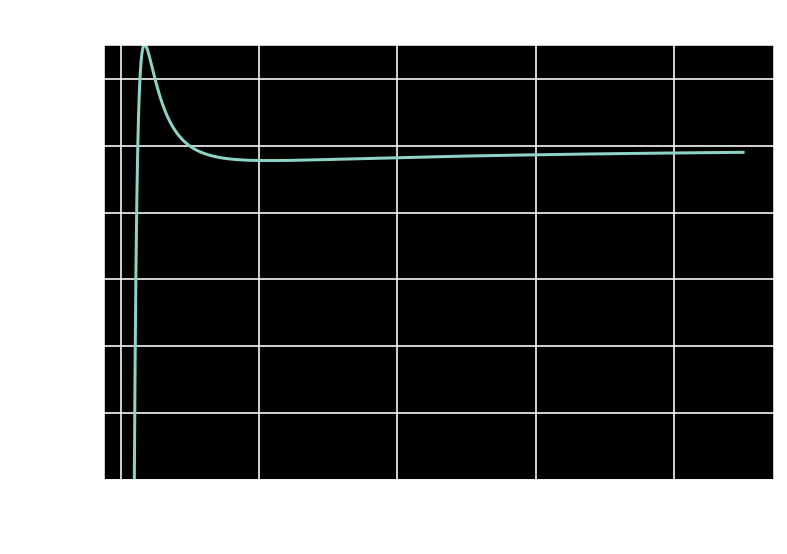

max potential:  0.15160860583505076
min potential:  -0.021985493647536634


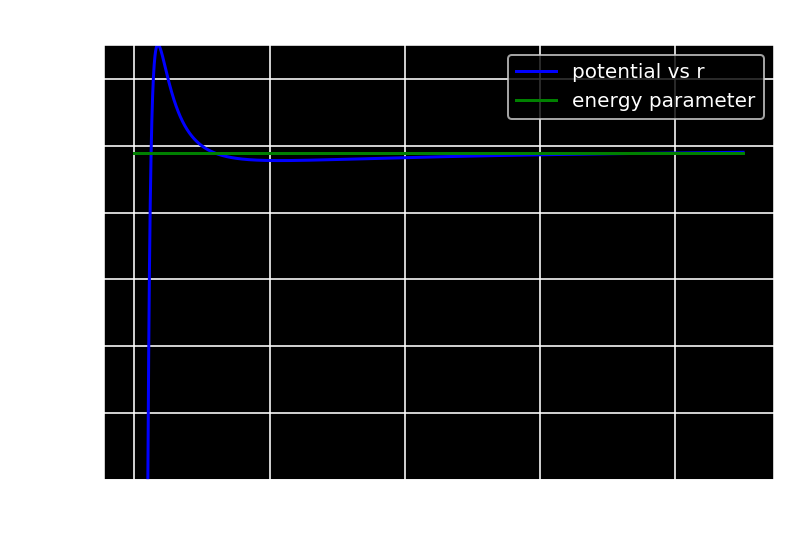

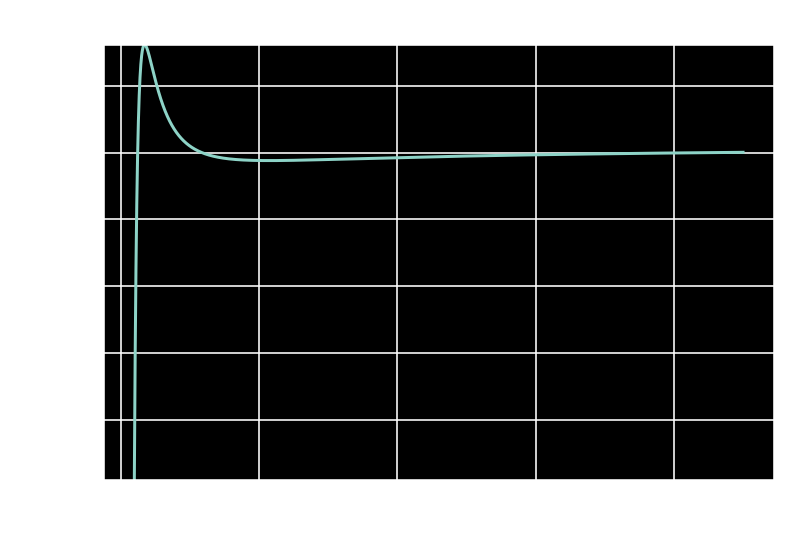

roots: [0.4025503355704698, 0.08505871007998184, 0.011660458642114511]
testa:  True
testb:  False
testc:  False
testd:  False
1limits of integration: 0.011660458758719097 to 0.08505870922939474
delphi:  3.698774469500177


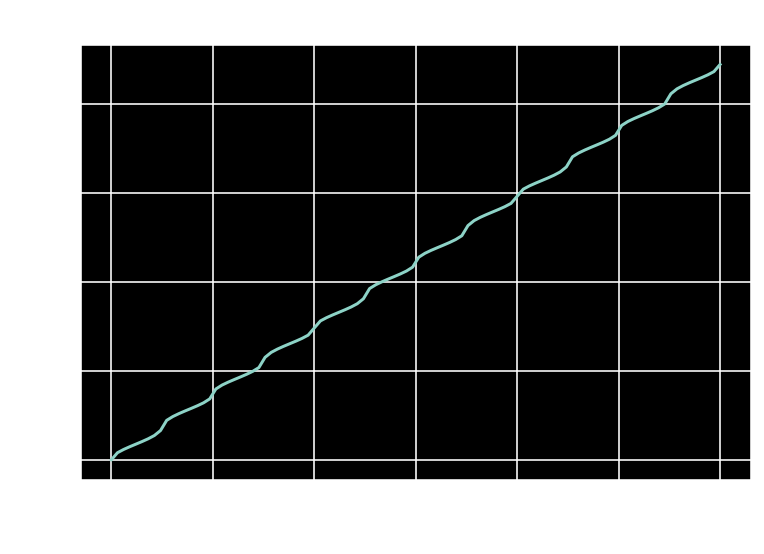

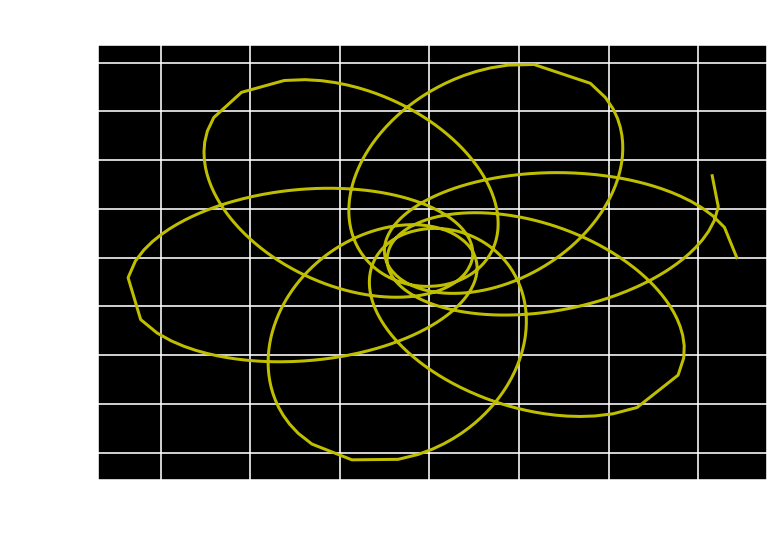

In [15]:
visandcalc(5,1,-0.01,20,6,1e-8,0.00002,5000000,2500,100)

Test B

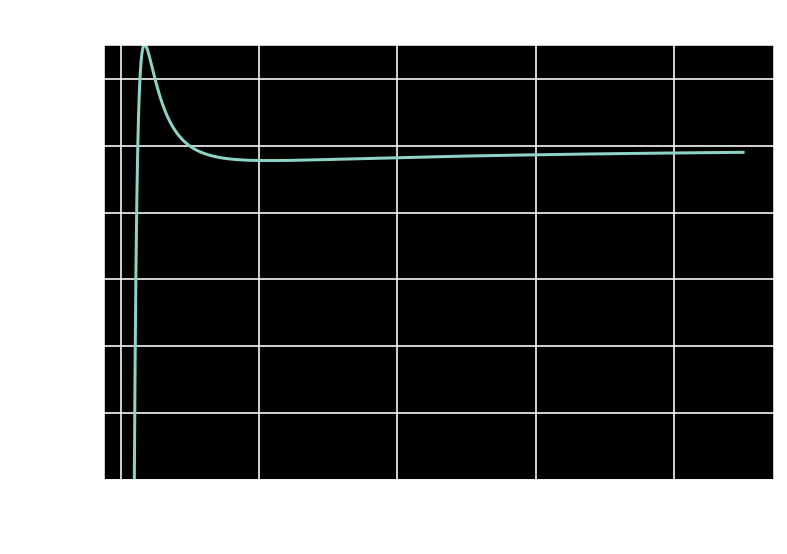

max potential:  0.15160860583505076
min potential:  -0.021985493647536634


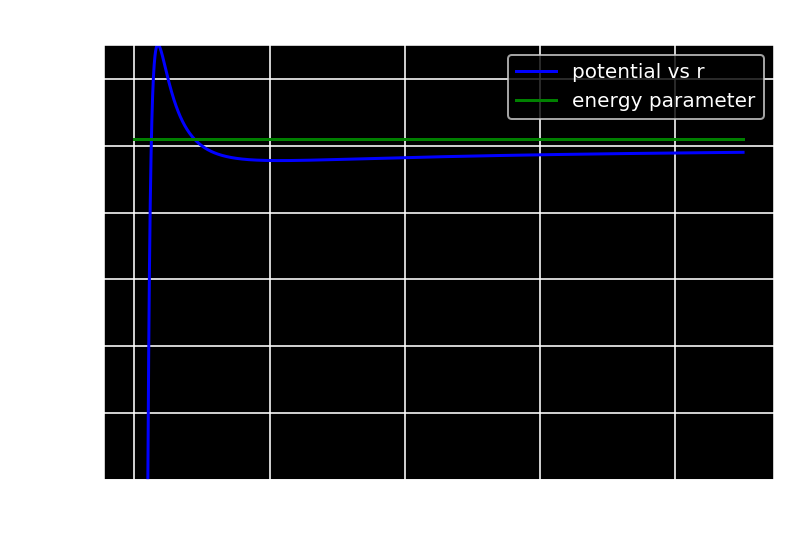

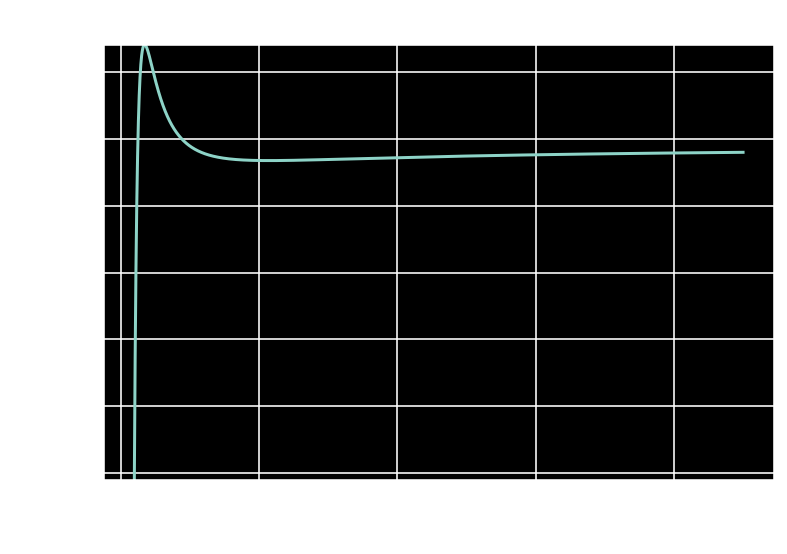

roots: [0.3978508888299284, 0.11222962353117281]
testa:  False
testb:  True
testc:  False
testd:  False
1limits of integration: 0.05 to 0.11222962240887657
delphi:  1.9514793694887316


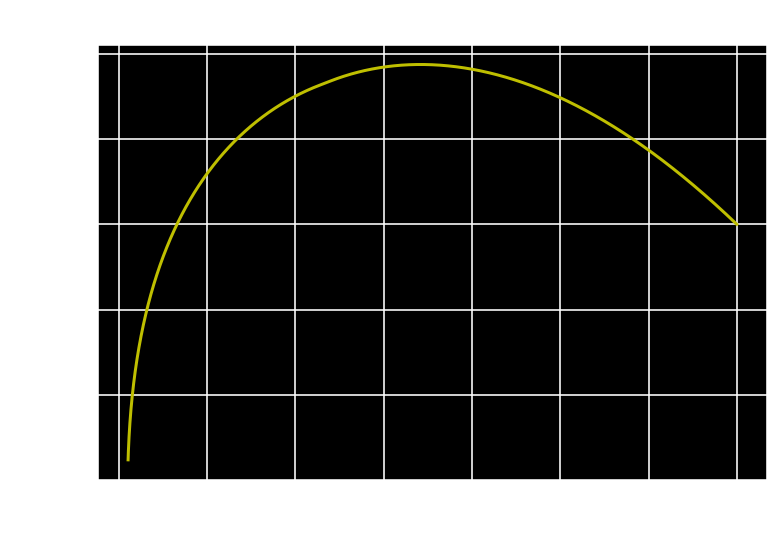

In [16]:
visandcalc(5,1,0.01,20,6,1e-8,0.00002,5000000,2500,100)

Test C

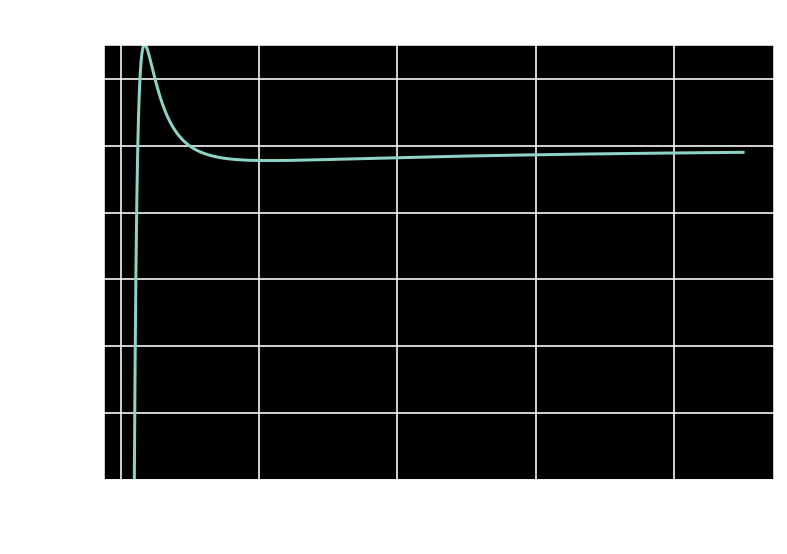

max potential:  0.15160860583505076
min potential:  -0.021985493647536634


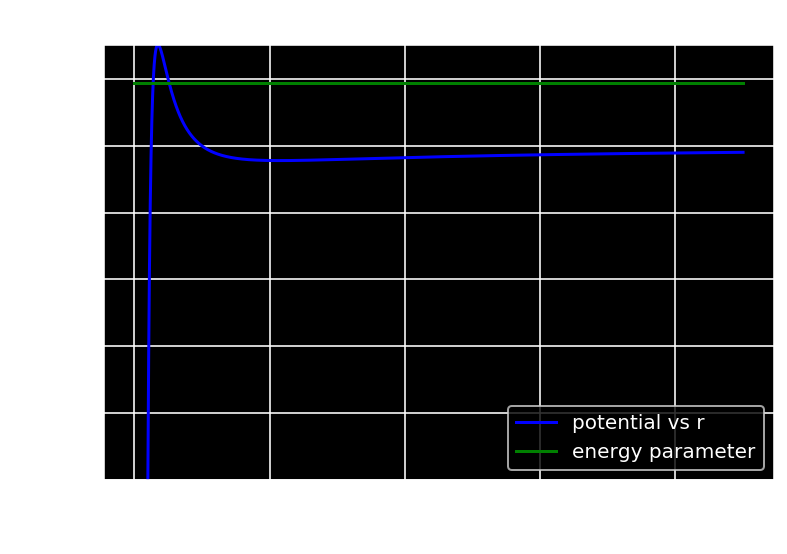

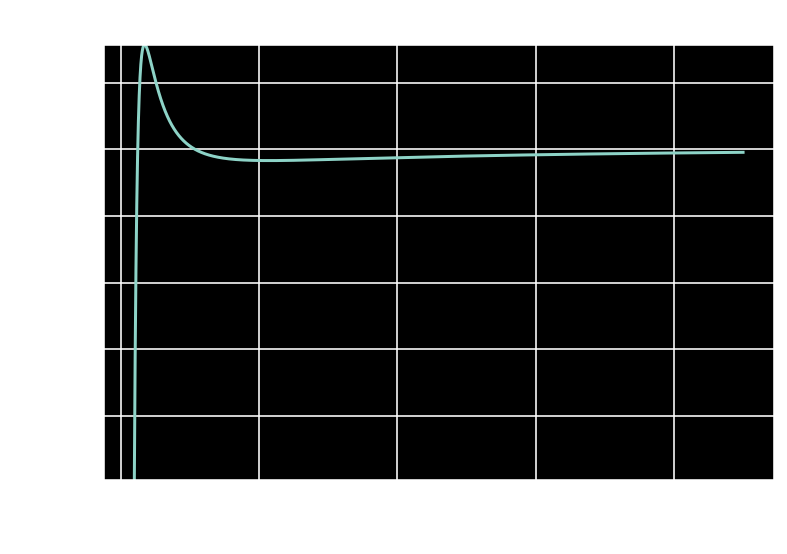

roots: [0.3600240096038415, 0.1951203643461288]
testa:  False
testb:  False
testc:  True
testd:  False
2limits of integration: 0.36002401320408156 to 0.5
delphi:  1.5812271697699796


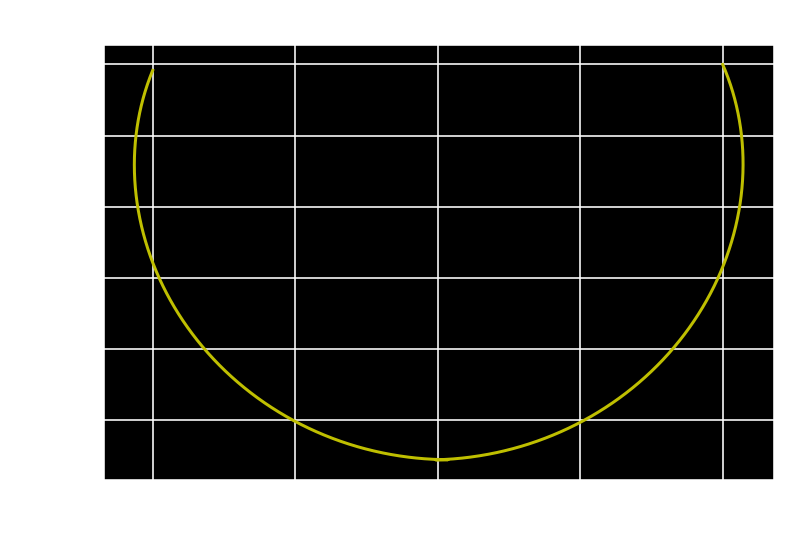

In [17]:
visandcalc(5,1,0.095,1,6,1e-8,0.00002,5000000,2500,100)

Test D

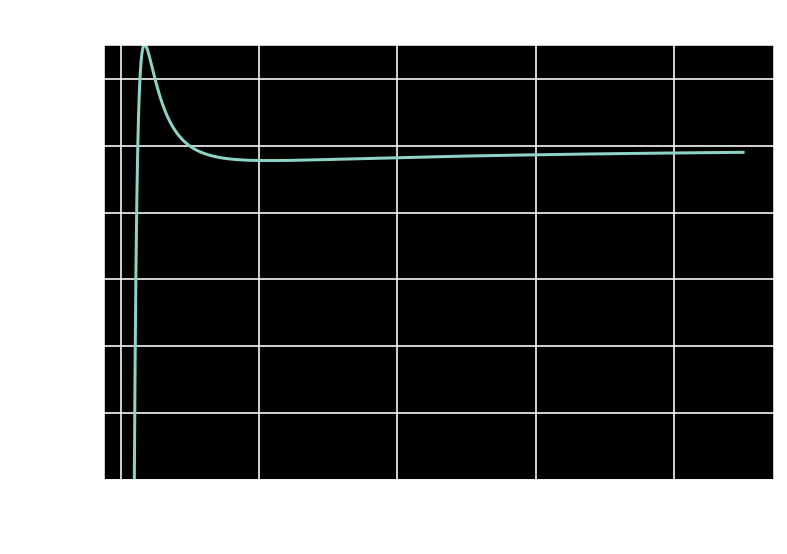

max potential:  0.15160860583505076
min potential:  -0.021985493647536634


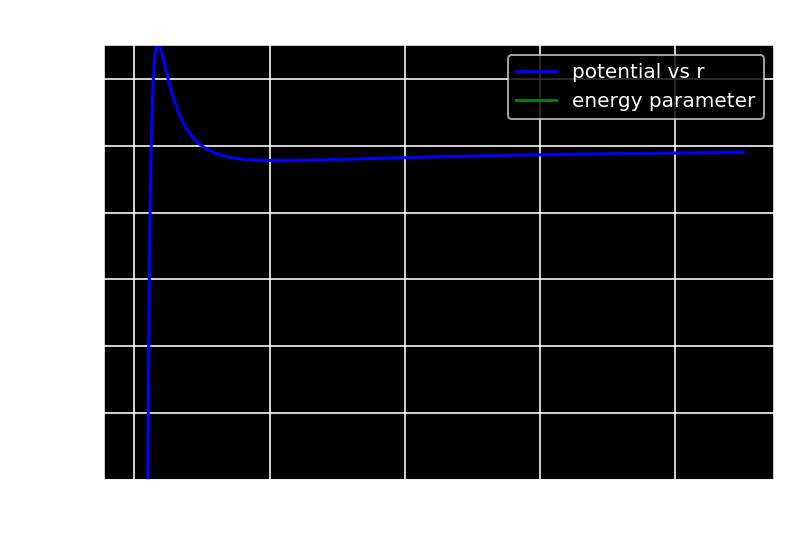

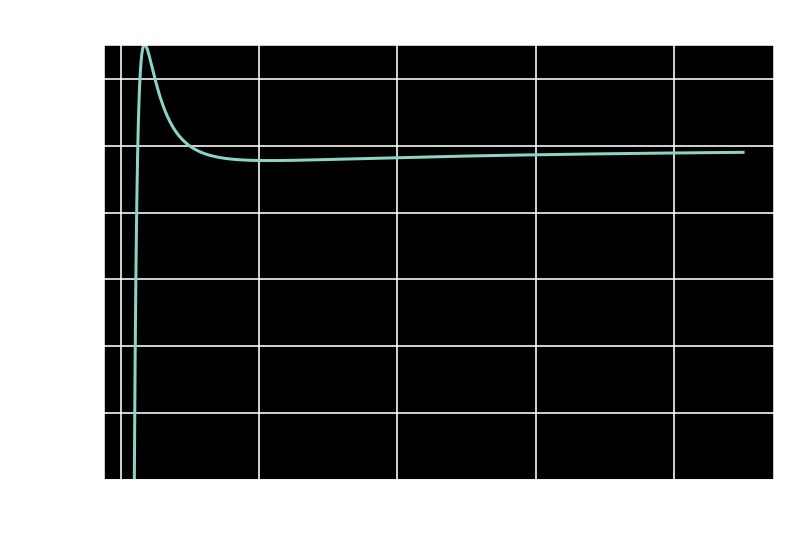

roots: []
testa:  False
testb:  False
testc:  False
testd:  True
1limits of integration: 0.02 to 0.499999995
delphi:  1.2055558655047753


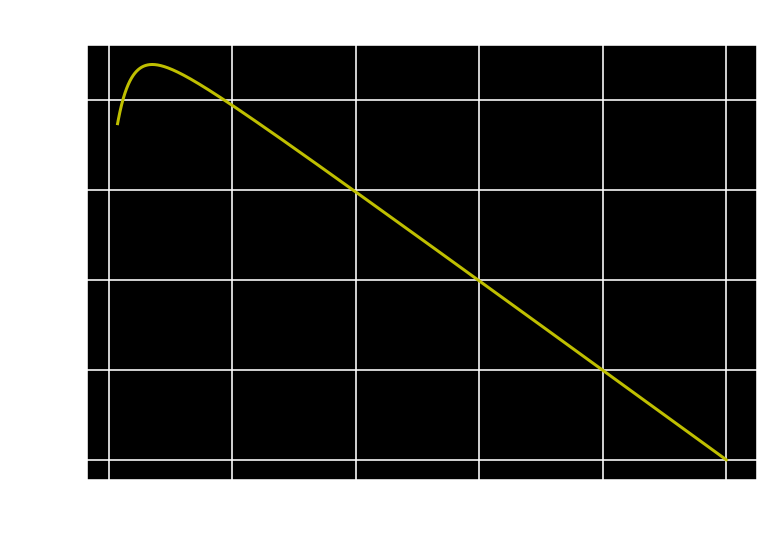

In [18]:
visandcalc(5,1,2,50,6,1e-8,0.00002,5000000,2500,100)

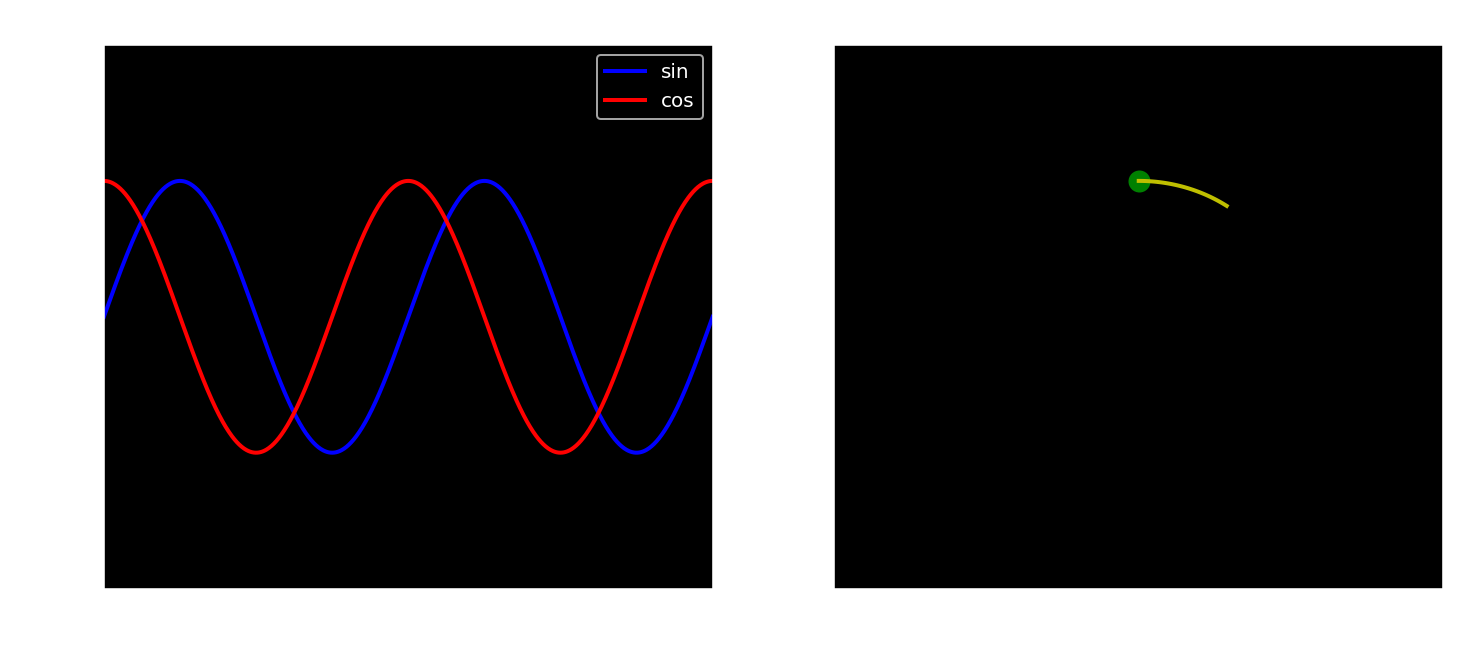

In [19]:


%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# create a figure and axes
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,2,1)   
ax2 = plt.subplot(1,2,2)

# set up the subplots as needed
ax1.set_xlim(( 0, 2))            
ax1.set_ylim((-2, 2))
ax1.set_xlabel('Time')
ax1.set_ylabel('Magnitude')

ax2.set_xlim((-2,2))
ax2.set_ylim((-2,2))
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Phase Plane')

# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax1.set_title('')
line1, = ax1.plot([], [], 'b', lw=2)     # ax.plot returns a list of 2D line objects
line2, = ax1.plot([], [], 'r', lw=2)
pt1, = ax2.plot([], [], 'g.', ms=20)
line3, = ax2.plot([], [], 'y', lw=2)

ax1.legend(['sin','cos']);



# animation function. This is called sequentially
def drawframe(n):
    x = np.linspace(0, 2, 1000)
    y1 = np.sin(2 * np.pi * (x - 0.01 * n))
    y2 = np.cos(2 * np.pi * (x - 0.01 * n))
    line1.set_data(x, y1)
    line2.set_data(x, y2)
    line3.set_data(y1[0:50],y2[0:50])
    pt1.set_data(y1[0],y2[0])
    txt_title.set_text('Frame = {0:4d}'.format(n))
    return (line1,line2)



from matplotlib import animation

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=100, interval=20, blit=True)


import matplotlib.pyplot as plt
import matplotlib.animation as animation
Writer = animation.FFMpegWriter(fps=30, codec='libx264')